In [1]:
%load_ext autoreload
%autoreload 2

## Labeling KL Bonding/Antibonding

In [2]:
from deeporb.default_net import default_net
chkpt = "../model_eval/local_models/best_model_state.pth"
data_name = "kl_constructed"
model = default_net(mean_std=data_name,chkpt=chkpt,batch_size=32)
model.cuda();

from deeporb.data2 import OrbDataset, OrbData
h5fn = "../model_eval/kl_constructed.h5"
data = OrbData(h5fn,batch_size=32,cutoff=7.6)

/home/king1305/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/king1305/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
#Plot confusion matrix
import torch
pred, ref = [], []
with torch.no_grad():
    for batch in data.test_dataloader():
        batch.cuda()
        ref.append(batch["label"])
        out = model(batch)
        pred.append(out["pred_label_logit"].argmax(axis=1))
torch.cuda.empty_cache()
pred = torch.hstack(pred)
ref = torch.hstack(ref)

/home/king1305/.local/lib/python3.10/site-packages/matscipy/neighbours.py:718: RuntimeWarning: Ratio of simulation cell size to cutoff is very large; reducing number of bins for neighbour list search, but this may be slow. Are you using a cell with lots of vacuum?
  return ffi.neighbour_list(quantities, cell_origin, cell,


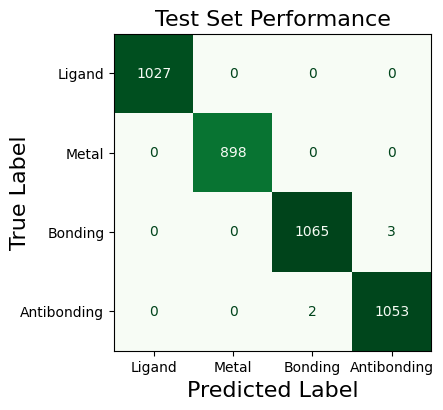

In [4]:
fs=16
# fs2 = 
djvfont = {'fontname':'DejaVu Sans'}

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have your true labels and predicted labels
y_true = ref.cpu()
y_pred = pred.cpu()

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(4.5,4.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax,colorbar=False,cmap='Greens')
plt.xticks([0,1,2,3],["Ligand","Metal","Bonding","Antibonding"],**djvfont)
plt.yticks([0,1,2,3],["Ligand","Metal","Bonding","Antibonding"],**djvfont)
# plt.show()
plt.title("Test Set Performance",fontsize=fs)
plt.xlabel("Predicted Label",fontsize=fs)
plt.ylabel("True Label",fontsize=fs,labelpad=-7)
plt.tight_layout()
plt.savefig("figures/tm_class_acc.png",dpi=500)